In [1]:
!pip install tensorflow==2.1.0

import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 421.8MB 20kB/s 
     |████████████████████████████████| 450kB 52.4MB/s 
     |████████████████████████████████| 3.9MB 50.5MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=ce991bd47ceca405f38c5704017604cd655ecbba262f90fd9c3def69644c4e60
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [2]:
!gdown --id "1To2deR_oTXn6yL2hTvVplqt3Iv2gMcPp"

Downloading...
From: https://drive.google.com/uc?id=1To2deR_oTXn6yL2hTvVplqt3Iv2gMcPp
To: /content/tutorial_dataset_SRCIM.zip
182MB [00:01, 112MB/s] 


In [3]:
import os
import zipfile

local_zip = '/content/tutorial_dataset_SRCIM.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

In [4]:
data_root = "/tmp/tutorial_dataset"

In [5]:
IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)

datagen_kwargs = dict(
    rescale=1./255,
    validation_split=.20
)

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [7]:
#Initiate Sequential Model
model = tf.keras.models.Sequential()

#First Convolutional Layer
model.add(
  tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    input_shape=(224, 224, 3),
    activation='relu'
  )
)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Second Convolution Layer
model.add(
  tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
  )
)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Third Convolutional Layer
model.add(
  tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation='relu'
  )
)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the fooled feature map
model.add(tf.keras.layers.Flatten())

#Add the fully connected layer with a ReLU
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))

#Add output layer
model.add(tf.keras.layers.Dense(train_generator.num_classes, activation="softmax"))

#Build model and print
model.build([None, 224, 224, 3])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [8]:
#Compile the model
optimizer = tf.keras.optimizers.Adam()

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['acc']
)

In [15]:
#Model training and validation
import numpy as np

callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator,
    epochs=20,
    verbose=1,
    callbacks=callbacks,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch
).history

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 200.0 steps, validate for 50.0 steps
Epoch 1/20
200/200 [==============================] - 26s 129ms/step - loss: 7.6685 - acc: 0.5000 - val_loss: 7.6685 - val_acc: 0.5000
Epoch 2/20
200/200 [==============================] - 26s 129ms/step - loss: 7.6685 - acc: 0.5000 - val_loss: 7.6685 - val_acc: 0.5000
Epoch 3/20
200/200 [==============================] - 26s 129ms/step - loss: 7.6685 - acc: 0.5000 - val_loss: 7.6685 - val_acc: 0.5000


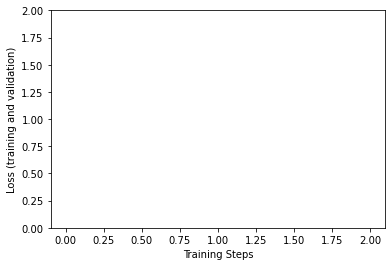

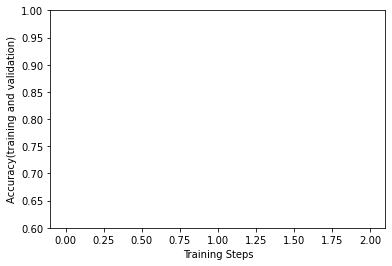

In [10]:
#Vizualize the training history in termos of accuracy and loss
import matplotlib.pyplot as plt

plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0, 2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.figure()
plt.ylabel("Accuracy(training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0.6, 1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])

In [12]:
#Check final loss and accuracy results
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final Loss: {:.2f}".format(final_loss))
print("Final Accuracy: {:2f}%".format(final_accuracy * 100))

  ...
    to  
  ['...']
50/50 [==============================] - 5s 96ms/step - loss: 7.6685 - acc: 0.5000
Final Loss: 7.67
Final Accuracy: 50.000000%


In [14]:
#Save trained model
model.save("srcim_model.h5")

#Can also save the weights only with:
#model.save_weights("srcim_model_weights.h5")